# Exercise 1

## 1) What is 'ERA5'? 
**Provide some background information.**

ERA5 is a global reanalysis, which means it combines vast amounts of historical observations into global estimates and is provided by the ECMWF. It contains hourly estimates of a large number of atmospheric, land and oceanic climate variables. It has a horizontal resolution of 30km from the year 1959 up to now (within 3 months of real time).

**Which modules and python libraries do you need for computation and plotting?**

In [17]:
!module load cdo

Loading cdo/1.9.10-gcc-8.5.0
  Loading requirement: openmpi/4.0.5-gcc-8.5.0 hdf5/1.10.7-gcc-8.5.0
    parallel-netcdf/1.12.2-gcc-8.5.0 netcdf-c/4.7.4-gcc-8.5.0
    eccodes/2.21.0-gcc-8.5.0 proj/8.1.0-gcc-8.5.0
>

In [18]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## 2) Look at the data
**Check the metadata of the dataset via terminal**

In [19]:
!module load cdo && ncdump -h era5_2m_temperature_1950-2021_monthly.nc

Loading cdo/1.9.10-gcc-8.5.0
  Loading requirement: openmpi/4.0.5-gcc-8.5.0 hdf5/1.10.7-gcc-8.5.0
    parallel-netcdf/1.12.2-gcc-8.5.0 netcdf-c/4.7.4-gcc-8.5.0
    eccodes/2.21.0-gcc-8.5.0 proj/8.1.0-gcc-8.5.0
>ncdump: era5_2m_temperature_1950-2021_monthly.nc: era5_2m_temperature_1950-2021_monthly.nc: No such file or directory


<br>**What variables and attributes do you see?**<br>
**variables**<br>
    - longitude<br>
    - latitude<br>
    - 2 metre temperature <br>
    
**attributes** <br>
    - CDI = "Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)" <br>
    - Conventions = "CF-1.6" <br>
    - history (what has already happend to the file)<br>
    - frequency = 'mon'<br>
    - CDO="Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)"<br>
    
**How many timesteps does this dataset contain?** - 864 (72 years) 

**What is the grid resolution?**<br>
gridcells: <br>
longitude = 360 / 1440 = 0.25 <br>
latitude =  181 / 721 = 0.25<br>
0.25, 0.25 grid resolution<br>

In [20]:
!module load cdo && cdo sinfon era5_2m_temperature_1950-2021_monthly.nc

Loading cdo/1.9.10-gcc-8.5.0
  Loading requirement: openmpi/4.0.5-gcc-8.5.0 hdf5/1.10.7-gcc-8.5.0
    parallel-netcdf/1.12.2-gcc-8.5.0 netcdf-c/4.7.4-gcc-8.5.0
    eccodes/2.21.0-gcc-8.5.0 proj/8.1.0-gcc-8.5.0
>cdo    sinfon: Open failed on >era5_2m_temperature_1950-2021_monthly.nc<
               No such file or directory


In [21]:
def print_mean_resolution(ds, latn='lat', lonn='lon'):
    dlat = np.mean(ds[latn].values[1:] - ds[latn].values[:-1])
    dlon = np.mean(ds[lonn].values[1:] - ds[lonn].values[:-1])
    print('Mean horizontal resolution: {:.2f}°'.format(np.mean([abs(dlat), abs(dlon)])))
    
data = xr.open_dataset('../../data/era5_2m_temperature_1950-2021_monthly.nc')
print_mean_resolution(data,latn='latitude',lonn='longitude')

Mean horizontal resolution: 0.25°


## 3) Remapping
Following the lecture content, remap the dataset to a grid of 3 x 3. Do not copy the
original dataset but access it from the source destination! (the remapped dataset
can/has to be saved in your home directory) How does the file size change with remapping?

Remapping with **cdo remapdis** using the regular grid specifier, for example with a 1x1 degree grid:

`cdo remapdist,r360x180 <infile> <outfile>`

In [22]:
print( '3x3 Grid: longitude = {:.0f} & latitude = {:.0f} grid cells'.format(360/3,180/3))

3x3 Grid: longitude = 120 & latitude = 60 grid cells


In [23]:
!module load cdo && cdo remapdis,r120x60 era5_2m_temperature_1950-2021_monthly.nc era5_2m_temperature_1950-2021_monthly.reg.nc

Loading cdo/1.9.10-gcc-8.5.0
  Loading requirement: openmpi/4.0.5-gcc-8.5.0 hdf5/1.10.7-gcc-8.5.0
    parallel-netcdf/1.12.2-gcc-8.5.0 netcdf-c/4.7.4-gcc-8.5.0
    eccodes/2.21.0-gcc-8.5.0 proj/8.1.0-gcc-8.5.0
>cdo    remapdis: Open failed on >era5_2m_temperature_1950-2021_monthly.nc<
                 No such file or directory


## !module load cdo && cdo sinfon era5_2m_temperature_1950-2021_monthly.reg.nc

In [24]:
! du -sh /users/students/lehre/mda_ws2022/data/era5_2m_temperature_1950-2021_monthly.nc era5_2m_temperature_1950-2021_monthly.reg.nc

1.7G	/users/students/lehre/mda_ws2022/data/era5_2m_temperature_1950-2021_monthly.nc
du: cannot access 'era5_2m_temperature_1950-2021_monthly.reg.nc': No such file or directory


In [25]:
print('Relative difference of {:0.4f}. Reduction of ?%.'.format(12.0/1700))

Relative difference of 0.0071. Reduction of ?%.


In [26]:
print('Total grid cells 0.25x0.25: {:0.0f}, 3x3:  {:0.0f}.'.format(1440*721*864,120*60*864))
print('Relative difference: {:0.4f}'.format((120*60*864)/(1440*721*864)))

Total grid cells 0.25x0.25: 897039360, 3x3:  6220800.
Relative difference: 0.0069


**File size depends crucially on the grid cells.**

## 4) Compute statistics
Compute the global annual mean, maximum, and minimum of 2 meter air temperature.
Try it with CDO and Python tools. Don't forget about weighting by grid cell area.

**CDO way:**

In [27]:
!module load cdo && cdo -fldmean -yearmonmean era5_2m_temperature_1950-2021_monthly.nc era5_2m_temperature_1950-2021.reg.yearly.gmean.nc
!module load cdo && cdo -yearmax -fldmax era5_2m_temperature_1950-2021_monthly.nc era5_2m_temperature_1950-2021.reg.yearly.gmax.nc
!module load cdo && cdo -yearmin -fldmin era5_2m_temperature_1950-2021_monthly.nc era5_2m_temperature_1950-2021.reg.yearly.gmin.nc

Loading cdo/1.9.10-gcc-8.5.0
  Loading requirement: openmpi/4.0.5-gcc-8.5.0 hdf5/1.10.7-gcc-8.5.0
    parallel-netcdf/1.12.2-gcc-8.5.0 netcdf-c/4.7.4-gcc-8.5.0
    eccodes/2.21.0-gcc-8.5.0 proj/8.1.0-gcc-8.5.0
>cdo(1) yearmonmean: Process started
cdo(1) yearmonmean: Open failed on >era5_2m_temperature_1950-2021_monthly.nc<
                    No such file or directory
Loading cdo/1.9.10-gcc-8.5.0
  Loading requirement: openmpi/4.0.5-gcc-8.5.0 hdf5/1.10.7-gcc-8.5.0
    parallel-netcdf/1.12.2-gcc-8.5.0 netcdf-c/4.7.4-gcc-8.5.0
    eccodes/2.21.0-gcc-8.5.0 proj/8.1.0-gcc-8.5.0
>cdo(1) fldmax: Process started
cdo(1) fldmax: Open failed on >era5_2m_temperature_1950-2021_monthly.nc<
               No such file or directory
Loading cdo/1.9.10-gcc-8.5.0
  Loading requirement: openmpi/4.0.5-gcc-8.5.0 hdf5/1.10.7-gcc-8.5.0
    parallel-netcdf/1.12.2-gcc-8.5.0 netcdf-c/4.7.4-gcc-8.5.0
    eccodes/2.21.0-gcc-8.5.0 proj/8.1.0-gcc-8.5.0
>cdo(1) fldmin: Process started
cdo(1) fldmin: Open failed o

**Python way:**

In [28]:
def calculate_global_mean_cos(ds, latn = 'lat', lonn = 'lon'):
    # calculate weights to account for longitude convergence
    lats = ds[latn]
    weights_lat = np.cos(np.radians(lats))

    # calculate the area-weighted mean over latitude and longitude
    ds_mean = ds.weighted(weights_lat).mean(dim=[latn, lonn], keep_attrs=True)
    return ds_mean

def calculate_annual_mean(ds, timen ='time'):
   
    def _wmean(ds):
        days_in_month = ds[timen].dt.days_in_month
        weights_month = days_in_month / days_in_month.sum()
        ds_mean = ds.weighted(weights_month).mean(dim=timen, keep_attrs=True)
        return ds_mean
    
    ds_mean = ds.groupby('time.year').apply(_wmean)
    ds_max = ds.groupby('time.year').max(dim=['lat', 'lon','time'])
    ds_min = ds.groupby('time.year').min(dim=['lat', 'lon','time'])
    return ds_mean, ds_max, ds_min

def average_time_first(ds,latn = 'lat', lonn = 'lon',timen ='time'):
    ds_first_mean = calculate_annual_mean(ds,timen = timen)
    ds_mean = calculate_global_mean_max_min_cos(ds_first_mean, lonn = lonn, latn = latn)
    
def global_average_first(ds,latn = 'lat', lonn = 'lon',timen ='time'):
    ds_first_mean = calculate_global_mean_max_min_cos(ds, lonn = lonn, latn = latn) 
    ds_mean = calculate_annual_mean(ds_first_mean, timen = timen)

In [29]:
data = xr.open_dataset('../../data/era5_2m_temperature_1950-2021_monthly.reg.nc')

#%timeit average_time_first(data['t2m'],'lat','lon','time')
#%timeit global_average_first(data['t2m'],'lat','lon','time')

data_yearly, data_max,data_min = calculate_annual_mean(data['t2m'],'time')
data_mean = calculate_global_mean_cos(data_yearly, lonn = 'lon', latn = 'lat')

#data_max = data_yearly.max(dim=['lat', 'lon'], keep_attrs=True)
#data_min = data_yearly.min(dim=['lat', 'lon'], keep_attrs=True)

## 5) Plotting
Plot the time series of global annual mean, maximum and minimum of 2 meter air temperature in degrees Celsius C for the whole period. Then plot the same variables only for Vienna from 2000 to 2020. Analyze the plot, which year was the coldest, and which one the hottest?

In [30]:
cdo_data_mean = xr.open_dataset('../../data/era5_2m_temperature_1950-2021.reg.yearly.gmean.nc').sel(lat=0,lon=0)['t2m']
cdo_data_min = xr.open_dataset('../../data/era5_2m_temperature_1950-2021.reg.yearly.gmin.nc').sel(lat=0,lon=0)['t2m']
cdo_data_max = xr.open_dataset('../../data/era5_2m_temperature_1950-2021.reg.yearly.gmax.nc').sel(lat=0,lon=0)['t2m']

In [31]:
ktoc = 273.15
data_python = {'mean': data_mean - ktoc, 'min': data_min - ktoc, 'max': data_max - ktoc}
data_cdo = {'mean': cdo_data_mean - ktoc, 'min': cdo_data_min - ktoc, 'max': cdo_data_max - ktoc}

In [32]:
def plotting_t2m_mean_min_max(data1,data2 = None, labels = None):
    mean = 'mean'
    max = 'max'
    min = 'min'
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))

    ax1.plot(data1[mean].year,data1[mean], color = 'g')
    if data2: 
        ax1.plot(data1[mean].year, data2[mean], color = 'g', linestyle = '--')
    ax1.grid()
    ax1.set_title('T2m global annual mean')
    if labels:
        ax1.legend(labels = labels)

    ax2.plot(data1[min].year,data1[min], color = 'b')
    if data2: 
        ax2.plot(data1[min].year, data2[min], color = 'b', linestyle = '--')
    ax2.grid()
    ax2.set_title('T2m global annual minimum')
    if labels:
        ax2.legend(labels = labels)

    ax3.plot(data1[max].year,data1[max], color = 'r')
    if data2: 
        ax3.plot(data1[max].year, data2[max], color = 'r', linestyle = '--')
    ax3.grid()
    ax3.set_title('T2m global annual maximum')
    if labels:
        ax3.legend(labels = labels)

    plt.show()

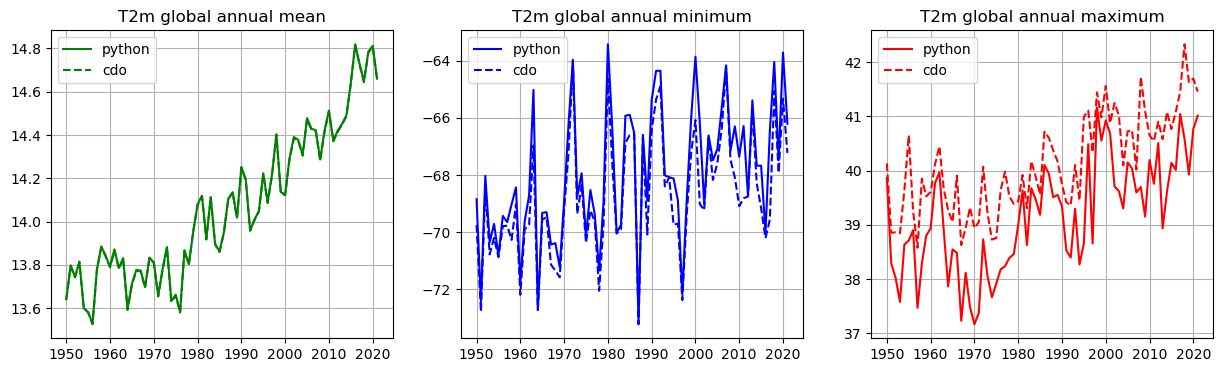

In [33]:
plotting_t2m_mean_min_max(data_python,data_cdo,labels = ['python','cdo'])

In [34]:
vienna_near = data.interp(lon=16.363449,lat=48.210033,method='nearest')
vienna_lin = data.interp(lon=16.363449,lat=48.210033,method='linear')

In [35]:
def calculate_annual_mean(ds, timen ='time'):
   
    def _wmean(ds):
        days_in_month = ds[timen].dt.days_in_month
        weights_month = days_in_month / days_in_month.sum()
        ds_mean = ds.weighted(weights_month).mean(dim=timen, keep_attrs=True)
        return ds_mean
    
    ds_mean = ds.groupby('time.year').apply(_wmean)
    return ds_mean

vienna_near_mean = calculate_annual_mean(vienna_near.t2m)
vienna_lin_mean =  calculate_annual_mean(vienna_lin.t2m)
vienna_lin_max = vienna_lin.t2m.groupby('time.year').max()
vienna_lin_min = vienna_lin.t2m.groupby('time.year').min()
vienna_near_max = vienna_near.t2m.groupby('time.year').max()
vienna_near_min = vienna_near.t2m.groupby('time.year').min()

In [36]:
ktoc = 273.15
data_near = {'mean': vienna_near_mean.loc[2000:2020] - ktoc, 'min': vienna_near_min.loc[2000:2020] - ktoc, 'max': vienna_near_max.loc[2000:2020] - ktoc}
data_lin = {'mean': vienna_lin_mean.loc[2000:2020] - ktoc, 'min': vienna_lin_min.loc[2000:2020] - ktoc, 'max': vienna_lin_max.loc[2000:2020] - ktoc}

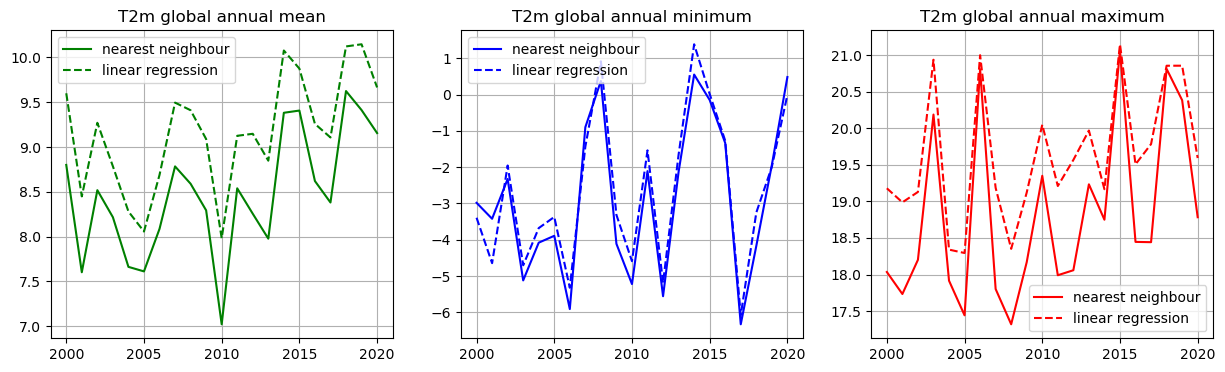

In [37]:
plotting_t2m_mean_min_max(data_near,data_lin,labels = ['nearest neighbour','linear regression'])

**Coldest year in Vienna**: in the mean the year 2010 but the absolute minimum in this periode was in 2006.  <br>
**Warmest year in Vienna**: in the mean is was the year 2018, the absolute maximum was in 2015. 